In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
from collections import Counter

In [ ]:
#This data set is transaction data so we read it directly 

In [2]:
with open("C:/Users/ARAVINDH/Downloads/book.csv") as f:
    book = f.read()

In [6]:
#Splitting the data into separate transactions

In [7]:
book=book.split("\n")

In [10]:
book_list = []
for i in book:
   book_list.append(i.split(","))

In [ ]:
#book list

In [13]:
all_book_list=[]
all_book_list=[i for item in book_list for i in item]

In [14]:
item_frequencies=Counter(all_book_list)

In [15]:
item_frequencies

Counter({'ChildBks': 1,
         'YouthBks': 1,
         'CookBks': 1,
         'DoItYBks': 1,
         'RefBks': 1,
         'ArtBks': 1,
         'GeogBks': 1,
         'ItalCook': 1,
         'ItalAtlas': 1,
         'ItalArt': 1,
         'Florence': 1,
         '0': 17155,
         '1': 4845,
         '': 1})

In [ ]:
# Sorting

In [16]:
item_frequencies=sorted(item_frequencies.items(),key = lambda x:x[1])

In [17]:
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

In [ ]:
#Bar plot

<ipython-input-29-150ca0944de2>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(height = frequencies[1:],x = list(range(0,13)),color='rgbkymc');plt.xticks(list(range(0,13),),items[1:]);plt.xlabel("items")


Text(0, 0.5, 'Count')

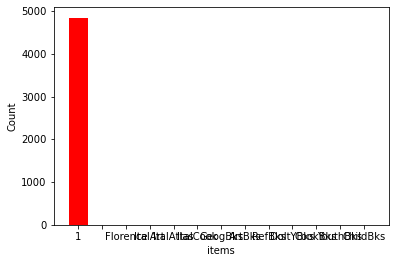

In [29]:
plt.bar(height = frequencies[1:],x = list(range(0,13)),color='rgbkymc');plt.xticks(list(range(0,13),),items[1:]);plt.xlabel("items")
plt.ylabel("Count")

In [30]:
book_series  = pd.DataFrame(pd.Series(book_list))
book_series.columns = ["transactions"]

In [32]:
x = book_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

In [34]:
frequent_itemsets = apriori(x, min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.998002,(0)
1,0.788711,(1)
2,0.787712,"(0, 1)"


In [36]:
# Most Frequent item sets(Support)

In [37]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

<ipython-input-45-0ae24036f699>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0,3)),height = frequent_itemsets.support[0:3],color='rgb');plt.xticks(list(range(0,3)),frequent_itemsets.itemsets[0:3])


Text(0, 0.5, 'support')

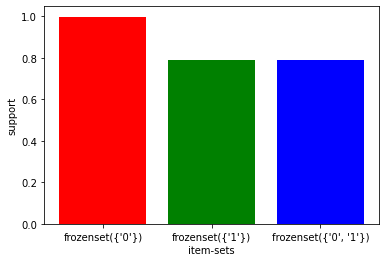

In [45]:
plt.bar(x = list(range(0,3)),height = frequent_itemsets.support[0:3],color='rgb');plt.xticks(list(range(0,3)),frequent_itemsets.itemsets[0:3])
plt.xlabel('item-sets');plt.ylabel('support')

In [46]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.shape

(2, 9)

In [48]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(1),0.998002,0.788711,0.787712,0.789289,1.000733,0.000577,1.002743
1,(1),(0),0.788711,0.998002,0.787712,0.998733,1.000733,0.000577,1.577423


In [50]:
rules.head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(1),0.998002,0.788711,0.787712,0.789289,1.000733,0.000577,1.002743
